In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [80]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [82]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

Сгруппируйте данные по дате, посчитайте количество продаж

In [83]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df.columns = ['Дата', 'Количество продаж']

Вывести несколько первых строк сгруппированных данных

In [84]:
grouped_df.head(5)

,Дата,Количество продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

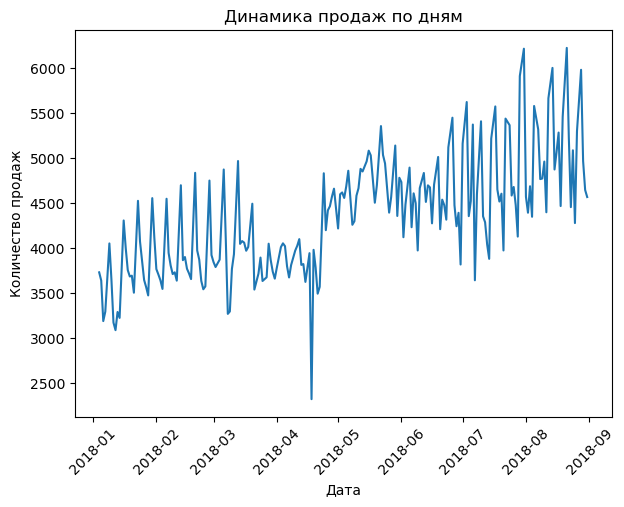

In [85]:
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'])
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [86]:
print("Линия постепенно поднимается вверх это значит что со временем продажи увеличиваются.Сильные колебания каждый день.Продажи то растут, то падают.В начале года продажи ниже.Постепенное увеличение к лету.Пики в июле–августе.В апреле есть резкое снижение почти до 2300 возможно это провал по продажам")

Линия постепенно поднимается вверх это значит что со временем продажи увеличиваются.Сильные колебания каждый день.Продажи то растут, то падают.В начале года продажи ниже.Постепенное увеличение к лету.Пики в июле–августе.В апреле есть резкое снижение почти до 2300 возможно это провал по продажам


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [87]:
max_sales_day = grouped_df.loc[grouped_df['Количество продаж'].idxmax()]
max_sales_day

Дата                 2018-08-21 00:00:00
Количество продаж                   6226
Name: 195, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [88]:
filtered_df = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.dayofweek == 2)]

top_products = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()
top_products_sorted = top_products.sort_values('Количество', ascending=False)

print(top_products_sorted.head(5))

   Номенклатура  Количество
1     product_1        2267
12    product_2        2060
0     product_0        1324
17    product_3         914
20    product_6         650


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [89]:
weather_df = pd.read_csv('astana(1).csv', encoding='cp1251', sep=';', engine='python')
weather_df

,Дата,T
0,2018-09-30,9.9
1,2018-09-30,11.9
2,2018-09-30,19.1
3,2018-09-30,19.7
4,2018-09-30,16.5
...,...,...
2177,2018-01-01,-6.7
2178,2018-01-01,-8.5
2179,2018-01-01,-11.1
2180,2018-01-01,-10.8


In [90]:
print(weather_df.columns)

Index(['Дата', 'T'], dtype='object')


In [91]:
weather_daily = weather_df.groupby('Дата', as_index=False)['T'].mean()
weather_daily.head()

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625


In [92]:
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'], dayfirst=True, errors='coerce')

In [93]:
weather_daily['Дата'].dtype

dtype('<M8[ns]')

In [94]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])

merged = grouped_df.merge(weather_daily, left_on='Дата', right_on='Дата', how='left')
merged = merged.rename(columns={'T': 'Температура'})
merged.head()


,Дата,Количество продаж,Температура
0,2018-01-04,3734,-7.6875
1,2018-01-05,3643,7.8250
2,2018-01-06,3193,19.9750
3,2018-01-07,3298,20.6500
4,2018-01-09,4055,6.8000


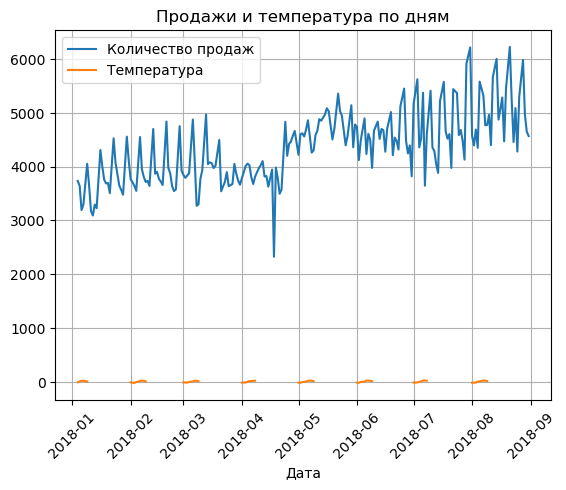

In [95]:
plt.plot(merged['Дата'], merged['Количество продаж'], label='Количество продаж')
plt.plot(merged['Дата'], merged['Температура'], label='Температура')
plt.xlabel('Дата')
plt.title('Продажи и температура по дням')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


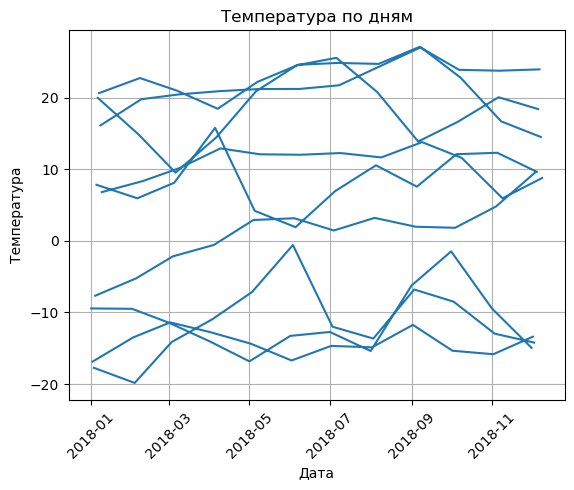

In [96]:
plt.plot(weather_daily['Дата'], weather_daily['T'])
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Температура по дням')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
